In [230]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [232]:
data_df = pd.read_csv('archive (3).zip').dropna()
print(data_df.head())

   case  site  Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0     1     1  Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1     2     1  Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2     3     1  Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   
3     4     1  Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4     5     1  Vic   f  2.0     91.5    56.3      85.5   36.0      71.0   

   earconch   eye  chest  belly  
0      54.5  15.2   28.0   36.0  
1      51.2  16.0   28.5   33.0  
2      51.9  15.5   30.0   34.0  
3      52.2  15.2   28.0   34.0  
4      53.2  15.1   28.5   33.0  


In [287]:
print(data_df.shape)
print(data_df.info())
print(data_df.describe())

(101, 14)
<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      101 non-null    int64  
 1   site      101 non-null    int64  
 2   Pop       101 non-null    object 
 3   sex       101 non-null    object 
 4   age       101 non-null    float64
 5   hdlngth   101 non-null    float64
 6   skullw    101 non-null    float64
 7   totlngth  101 non-null    float64
 8   taill     101 non-null    float64
 9   footlgth  101 non-null    float64
 10  earconch  101 non-null    float64
 11  eye       101 non-null    float64
 12  chest     101 non-null    float64
 13  belly     101 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 15.9+ KB
None
             case        site         age     hdlngth      skullw    totlngth  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean    52.762376    3.673267    3.

In [236]:
MissingVals = data_df[data_df.isna().any(axis=1)]
print(MissingVals)
NullVals = data_df.isnull().sum()

Empty DataFrame
Columns: [case, site, Pop, sex, age, hdlngth, skullw, totlngth, taill, footlgth, earconch, eye, chest, belly]
Index: []


In [238]:
clean_df = data_df.drop([10, 13, 15])
clean_df.drop('Pop', axis=1, inplace = True)
clean_df.drop('case', axis=1, inplace = True)
clean_df.reset_index(drop=True, inplace = True)
NullCheck = clean_df[clean_df.isna().any(axis=1)]
print(NullCheck)

Empty DataFrame
Columns: [site, sex, age, hdlngth, skullw, totlngth, taill, footlgth, earconch, eye, chest, belly]
Index: []


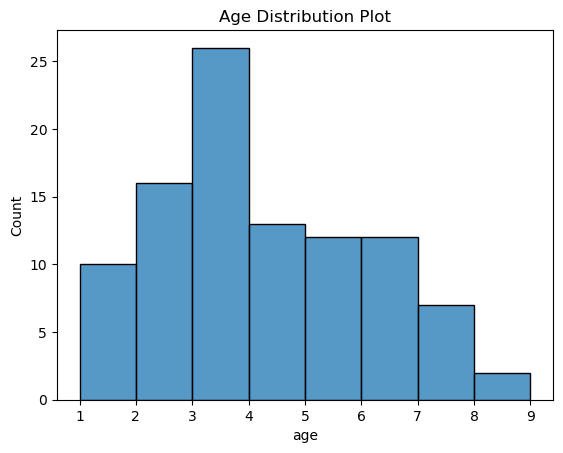

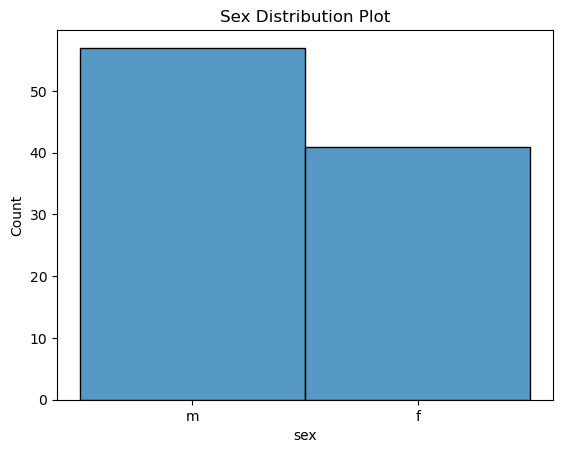

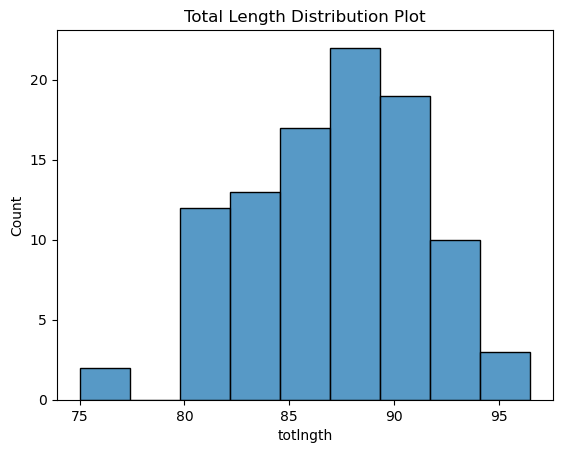

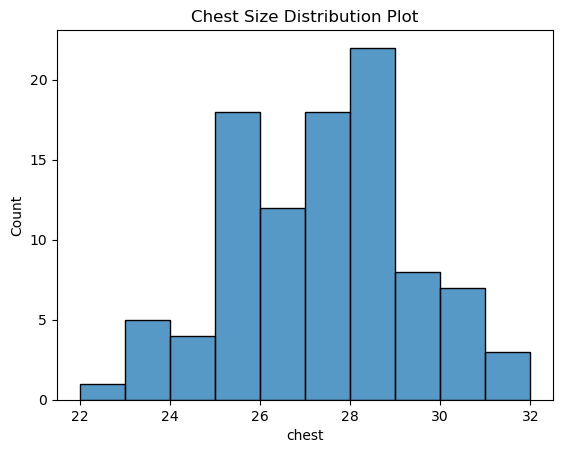

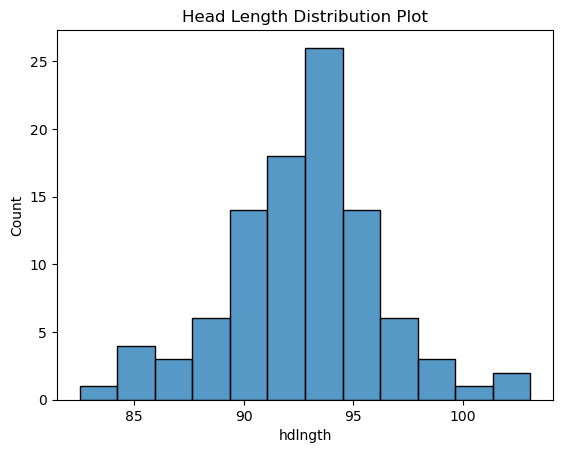

In [289]:
plt.title('Age Distribution Plot')
sns.histplot(clean_df['age'])
plt.show()

plt.title('Sex Distribution Plot')
sns.histplot(clean_df['sex'])
plt.show()

plt.title('Total Length Distribution Plot')
sns.histplot(clean_df['totlngth'])
plt.show()

plt.title('Chest Size Distribution Plot')
sns.histplot(clean_df['chest'])
plt.show()

plt.title('Head Length Distribution Plot')
sns.histplot(clean_df['hdlngth'])
plt.show()

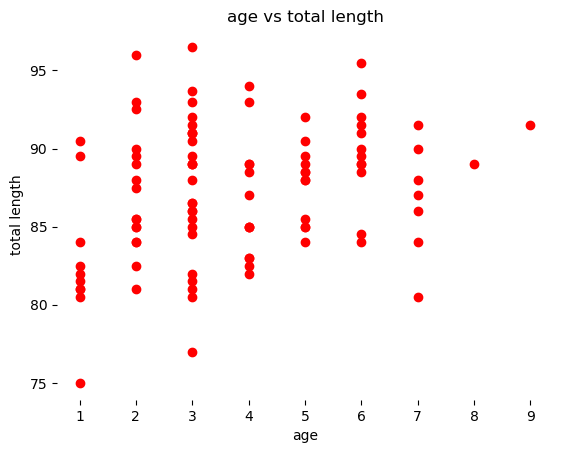

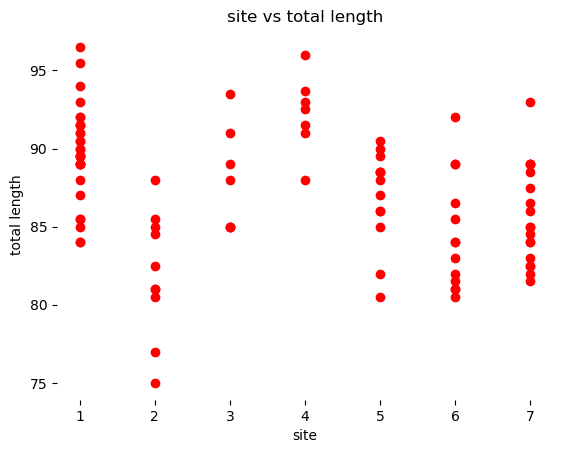

In [291]:
plt.scatter(clean_df['age'], clean_df['totlngth'], color = 'red')
plt.title('age vs total length')
plt.xlabel('age')
plt.ylabel('total length')
plt.box(False)
plt.show()

plt.scatter(clean_df['site'], clean_df['totlngth'], color = 'red')
plt.title('site vs total length')
plt.xlabel('site')
plt.ylabel('total length')
plt.box(False)
plt.show()

In [293]:
X = clean_df.iloc[:, :-1].values
y = clean_df.iloc[:, -1].values
print(X)
print('-----------------------------------------')
print(y)

[[1 'm' 8.0 ... 54.5 15.2 28.0]
 [1 'f' 6.0 ... 51.2 16.0 28.5]
 [1 'f' 6.0 ... 51.9 15.5 30.0]
 ...
 [7 'f' 6.0 ... 45.4 13.0 25.0]
 [7 'm' 4.0 ... 45.9 15.4 25.0]
 [7 'f' 3.0 ... 46.0 14.8 28.5]]
-----------------------------------------
[36.  33.  34.  34.  33.  32.  34.5 34.  33.  32.  33.  32.  35.  31.
 32.  32.  36.  40.  36.  35.  32.  35.  38.  28.  30.  32.  33.  31.
 34.  30.  28.5 35.5 36.  31.5 30.  25.  30.  33.  31.  31.5 33.  35.
 35.5 36.  38.5 32.5 33.5 36.5 36.  31.5 39.  33.  36.  30.  31.  32.
 28.5 33.  38.5 34.  29.5 30.  34.  34.  34.  30.  28.  34.  33.5 33.
 35.  28.  28.5 30.5 35.  32.  29.  28.5 31.5 31.  36.  31.5 30.5 32.5
 32.  31.  31.  35.  31.  33.  31.5 32.  35.  27.  33.  30.  29.  33.5]


In [295]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[0.0 1.0 1 ... 54.5 15.2 28.0]
 [1.0 0.0 1 ... 51.2 16.0 28.5]
 [1.0 0.0 1 ... 51.9 15.5 30.0]
 ...
 [1.0 0.0 7 ... 45.4 13.0 25.0]
 [0.0 1.0 7 ... 45.9 15.4 25.0]
 [1.0 0.0 7 ... 46.0 14.8 28.5]]


In [312]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 5)

In [314]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(type(regressor))
print(regressor.score(X_train, y_train))

<class 'sklearn.linear_model._base.LinearRegression'>
0.5337940574095399


In [316]:
regressor = LinearRegression()
regressor.fit(X_test, y_test)
print(type(regressor))
print(regressor.score(X_test, y_test))

<class 'sklearn.linear_model._base.LinearRegression'>
0.5901689824777443


In [320]:
y_pred = regressor.predict(X_test)

In [322]:
np.set_printoptions(precision=2)
result = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
print(result)
#Coefficients
print(f'Coefficients: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

[[32.43 31.  ]
 [31.73 30.  ]
 [36.49 39.  ]
 [32.11 34.  ]
 [30.77 29.  ]
 [29.09 28.  ]
 [35.27 33.  ]
 [31.39 32.  ]
 [36.54 40.  ]
 [31.91 33.  ]
 [29.87 33.  ]
 [37.56 36.  ]
 [31.44 33.  ]
 [32.68 29.5 ]
 [34.79 34.  ]
 [31.15 31.5 ]
 [33.11 36.  ]
 [32.75 28.5 ]
 [33.48 35.  ]
 [33.16 33.5 ]
 [28.19 27.  ]
 [35.29 36.  ]
 [35.57 38.  ]
 [32.97 30.  ]
 [32.37 31.  ]
 [29.64 33.  ]
 [31.7  35.  ]
 [27.79 25.  ]
 [30.11 31.  ]
 [35.02 34.5 ]
 [32.3  32.  ]
 [34.24 34.  ]
 [30.03 33.  ]
 [33.61 35.5 ]
 [33.25 32.  ]
 [29.04 28.  ]
 [32.97 31.  ]
 [36.65 35.  ]
 [30.91 32.  ]
 [31.95 31.5 ]
 [31.15 30.  ]
 [33.53 33.5 ]
 [33.72 32.  ]
 [34.65 34.  ]
 [32.3  33.5 ]
 [28.17 28.5 ]
 [34.91 34.  ]
 [33.83 36.  ]
 [33.44 32.  ]]
Coefficients: [-0.18  0.18  0.11  0.32 -0.04 -0.11  0.34 -0.23  0.01 -0.05 -0.23  0.7 ]
Intercept: 6.342376581302521
